# Training Neural Networks with Keras

### Goals: 
- Intro: train a neural network with high level framework `Keras`

### Dataset:
- Digits: 10 class handwritten digits
- http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [19]:
GPU=False
CPU=True

import tensorflow as tf
from keras import backend as K

num_cores = 4

if GPU:
    num_GPU = 1
    num_CPU = 1
if CPU:
    num_CPU = 1
    num_GPU = 0

config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,\
        inter_op_parallelism_threads=num_cores, allow_soft_placement=True,\
        device_count = {'CPU' : num_CPU, 'GPU' : num_GPU})
session = tf.Session(config=config)
K.set_session(session)

In [1]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()

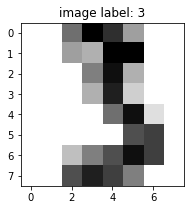

In [2]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("image label: %d" % digits.target[sample_index]);

### Preprocessing

- normalization
- train/test split

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.15, random_state=37)

# mean = 0 ; standard deviation = 1.0
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(scaler.mean_)
# print(scaler.scale_)

Let's display the one of the transformed sample (after feature standardization):

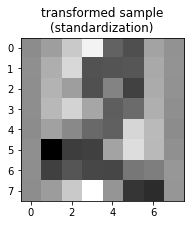

In [4]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(X_train[sample_index].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("transformed sample\n(standardization)");

The scaler objects makes it possible to recover the original sample:

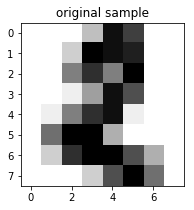

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(scaler.inverse_transform(X_train[sample_index]).reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("original sample");

In [6]:
print(X_train.shape, y_train.shape)

(1527, 64) (1527,)


In [7]:
print(X_test.shape, y_test.shape)

(270, 64) (270,)


# I) Feed Forward NN with Keras

Objectives of this section:

- Build and train a first feedforward network using `Keras`
    - https://keras.io/getting-started/sequential-model-guide/
- Experiment with different optimizers, activations, size of layers, initializations

### a) Keras Workflow

To build a first neural network we need to turn the target variable into a vector "one-hot-encoding" representation. Here are the labels of the first samples in the training set encoded as integers:

In [8]:
y_train[:3]

array([2, 9, 5], dtype=int32)

Keras provides a utility function to convert integer-encoded categorical variables as one-hot encoded values:

In [9]:
import keras
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

/home/nicolas/.anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [17]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6480367811286100594
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 197918720
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15774834927683947557
physical_device_desc: "device: 0, name: GeForce GTX 780 Ti, pci bus id: 0000:01:00.0, compute capability: 3.5"
]


We can now build an train a our first feed forward neural network using the high level API from keras:

- first we define the model by stacking layers with the right dimensions
- then we define a loss function and plug the SGD optimizer
- then we feed the model the training data for fixed number of epochs

In [48]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers

N = X_train.shape[1]
H = 100
K = 10

model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy', metrics=['accuracy'])

Wsave = model.get_weights()

model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
1527/1527 [==============================] - 0s 261us/step - loss: 0.8429 - acc: 0.7970
Epoch 2/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.2890 - acc: 0.9417
Epoch 3/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.1979 - acc: 0.9627
Epoch 4/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.1539 - acc: 0.9712
Epoch 5/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.1279 - acc: 0.9777
Epoch 6/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.1096 - acc: 0.9804
Epoch 7/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.0958 - acc: 0.9830
Epoch 8/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0850 - acc: 0.9843
Epoch 9/15
1527/1527 [==============================] - 0s 25us/step - loss: 0.0766 - acc: 0.9869
Epoch 10/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0693 - acc: 0.9869
Epoch 11/15
1527/1

In [44]:
model.set_weights(Wsave)

### b) Exercises: Impact of the Optimizer

- Try to decrease the learning rate value by 10 or 100. What do you observe?

- Try to increase the learning rate value to make the optimization diverge.

- Configure the SGD optimizer to enable a Nesterov momentum of 0.9
  
Note that the keras API documentation is available at:

https://keras.io/

It is also possible to learn more about the parameters of a class by using the question mark: type and evaluate:

```python
optimizers.SGD?
```

in a jupyter notebook cell.

In [46]:
model.set_weights(Wsave)

model.compile(optimizer=optimizers.SGD(lr=1),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
1527/1527 [==============================] - 0s 249us/step - loss: 0.3348 - acc: 0.8978
Epoch 2/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0827 - acc: 0.9784
Epoch 3/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0442 - acc: 0.9915
Epoch 4/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.0215 - acc: 0.9967
Epoch 5/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.0133 - acc: 0.9987
Epoch 6/15
1527/1527 [==============================] - 0s 25us/step - loss: 0.0090 - acc: 1.0000
Epoch 7/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.0070 - acc: 1.0000
Epoch 8/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.0057 - acc: 1.0000
Epoch 9/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.0048 - acc: 1.0000
Epoch 10/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.0041 - acc: 1.0000
Epoch 11/15
1527/1

The training does not work anymore, we fail to minimize the loss. The accuracy stays the same

In [47]:
model.set_weights(Wsave)

model.compile(optimizer=optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32);

Epoch 1/15
1527/1527 [==============================] - 0s 259us/step - loss: 0.4012 - acc: 0.8723
Epoch 2/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0737 - acc: 0.9790
Epoch 3/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0302 - acc: 0.9935
Epoch 4/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.0159 - acc: 0.9980
Epoch 5/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0104 - acc: 1.0000
Epoch 6/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0077 - acc: 1.0000
Epoch 7/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.0060 - acc: 1.0000
Epoch 8/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.0051 - acc: 1.0000
Epoch 9/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0043 - acc: 1.0000
Epoch 10/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0038 - acc: 1.0000
Epoch 11/15
1527/1

The Nesterov does not permit to improve the solution, just likje increasing the step.

In [36]:
# %load solutions/keras_sgd_and_momentum.py
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

optimizer = optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=15, batch_size=32)


# Analysis:
#
# Setting the learning rate value to a small value (e.g. lr=0.001 on
# this dataset) makes the model train much slower (it has not
# converged yet after 15 epochs).
#
# Using momentum tends to mitigate the small learning rate / slow
# training problem a bit.
#
# Setting the learning rate to a very large value (e.g. lr=10)
# makes the model randomly bounce around a good local
# minimum and therefore prevent it to reach a low training loss even
# after 30 epochs.


Epoch 1/15
1527/1527 [==============================] - 0s 186us/step - loss: 0.3925 - acc: 0.8828
Epoch 2/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0737 - acc: 0.9830
Epoch 3/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.0357 - acc: 0.9935
Epoch 4/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0195 - acc: 0.9974
Epoch 5/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0117 - acc: 0.9993
Epoch 6/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0077 - acc: 1.0000
Epoch 7/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0060 - acc: 1.0000
Epoch 8/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0048 - acc: 1.0000
Epoch 9/15
1527/1527 [==============================] - 0s 22us/step - loss: 0.0041 - acc: 1.0000
Epoch 10/15
1527/1527 [==============================] - 0s 21us/step - loss: 0.0037 - acc: 1.0000
Epoch 11/15
1527/1

- Replace the SGD optimizer by the Adam optimizer from keras and run it
  with the default parameters.

- Add another hidden layer and use the "Rectified Linear Unit" for each
  hidden layer. Can you still train the model with Adam with its default global
  learning rate?

- Bonus: try the Adadelta optimizer (no learning rate to set).

Hint: use `optimizers.<TAB>` to tab-complete the list of implemented optimizers in Keras.

In [50]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 0s 325us/step - loss: 1.5164 - acc: 0.5737
Epoch 2/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.5497 - acc: 0.8939
Epoch 3/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.3381 - acc: 0.9339
Epoch 4/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.2452 - acc: 0.9561
Epoch 5/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.1930 - acc: 0.9614
Epoch 6/15
1527/1527 [==============================] - 0s 26us/step - loss: 0.1584 - acc: 0.9692
Epoch 7/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.1336 - acc: 0.9771
Epoch 8/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.1150 - acc: 0.9823
Epoch 9/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.1008 - acc: 0.9823
Epoch 10/15
1527/1527 [==============================] - 0s 23us/step - loss: 0.0883 - acc: 0.9843
Epoch 11/15
1527/1

In [52]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

optimizer = optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 1s 352us/step - loss: 2.0819 - acc: 0.3209
Epoch 2/15
1527/1527 [==============================] - 0s 24us/step - loss: 1.3079 - acc: 0.6202
Epoch 3/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.7983 - acc: 0.8140
Epoch 4/15
1527/1527 [==============================] - 0s 25us/step - loss: 0.4569 - acc: 0.9371
Epoch 5/15
1527/1527 [==============================] - 0s 25us/step - loss: 0.2655 - acc: 0.9594
Epoch 6/15
1527/1527 [==============================] - 0s 25us/step - loss: 0.1795 - acc: 0.9712
Epoch 7/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.1326 - acc: 0.9797
Epoch 8/15
1527/1527 [==============================] - 0s 26us/step - loss: 0.1037 - acc: 0.9836
Epoch 9/15
1527/1527 [==============================] - 0s 24us/step - loss: 0.0833 - acc: 0.9862
Epoch 10/15
1527/1527 [==============================] - 0s 25us/step - loss: 0.0691 - acc: 0.9908
Epoch 11/15
1527/1

In [54]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

optimizer = optimizers.Adadelta()
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32)

Epoch 1/15
1527/1527 [==============================] - 1s 355us/step - loss: 1.6610 - acc: 0.4846
Epoch 2/15
1527/1527 [==============================] - 0s 27us/step - loss: 0.7545 - acc: 0.8356
Epoch 3/15
1527/1527 [==============================] - 0s 26us/step - loss: 0.3678 - acc: 0.9325
Epoch 4/15
1527/1527 [==============================] - 0s 26us/step - loss: 0.2155 - acc: 0.9594
Epoch 5/15
1527/1527 [==============================] - 0s 26us/step - loss: 0.1482 - acc: 0.9718
Epoch 6/15
1527/1527 [==============================] - 0s 26us/step - loss: 0.1102 - acc: 0.9810
Epoch 7/15
1527/1527 [==============================] - 0s 26us/step - loss: 0.0872 - acc: 0.9856
Epoch 8/15
1527/1527 [==============================] - 0s 26us/step - loss: 0.0697 - acc: 0.9876
Epoch 9/15
1527/1527 [==============================] - 0s 27us/step - loss: 0.0563 - acc: 0.9908
Epoch 10/15
1527/1527 [==============================] - 0s 27us/step - loss: 0.0466 - acc: 0.9928
Epoch 11/15
1527/1

In [ ]:
# %load solutions/keras_adam_and_adadelta.py
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(H))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
model.compile(optimizer="adam", loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=15, batch_size=32)

# Analysis:
#
# Adam with its default global learning rate of 0.001 tends to work
# in many settings often converge as fast or faster than SGD
# with a well tuned learning rate.
#
# Adadelta has no learning rate setting at all
#
# References:
#
# Adadelta: https://arxiv.org/abs/1212.5701
# Adam:     https://arxiv.org/abs/1412.6980


### c) Exercises: forward pass and generalization

- Compute predictions on test set using `model.predict_classes(...)`
- Compute average accuracy of the model on the test set

test acc: 0.9778


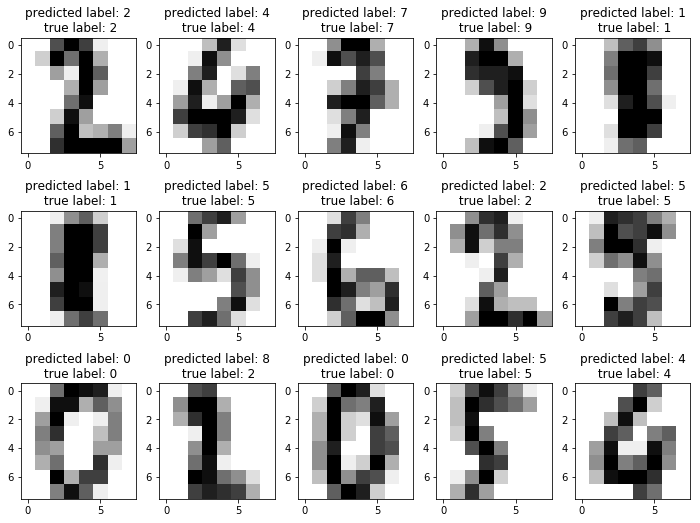

In [57]:
# %load solutions/keras_accuracy_on_test_set.py
y_predicted = model.predict_classes(X_test, verbose=0)

# Let's display the first inputs image, the predicted labels and the true labels
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(scaler.inverse_transform(X_test[i]).reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("predicted label: %d\n true label: %d"
              % (y_predicted[i], y_test[i]))
    
print("test acc: %0.4f" % np.mean(y_predicted == y_test))

## d) Home assignment: impact of initialization

Let us now study the impact of a bad initialization when training
a deep feed forward network.

By default Keras dense layers use the "Glorot Uniform" initialization
strategy to initialize the weight matrices:

- each weight coefficient is randomly sampled from [-scale, scale]
- scale is proportional to $\frac{1}{\sqrt{n_{in} + n_{out}}}$

This strategy is known to work well to initialize deep neural networks
with "tanh" or "relu" activation functions and then trained with
standard SGD.

To assess the impact of initialization let us plug an alternative init
scheme into a 2 hidden layers networks with "tanh" activations.
For the sake of the example let's use normal distributed weights
with a manually adjustable scale (standard deviation) and see the
impact the scale value:

In [58]:
from keras import initializers

normal_init = initializers.RandomNormal(stddev=0.01)

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("tanh"))
model.add(Dense(K, kernel_initializer=normal_init))
model.add(Activation("softmax"))

model.compile(optimizer=optimizers.SGD(lr=0.1),
              loss='categorical_crossentropy')

history = model.fit(X_train, Y_train,
                    epochs=10, batch_size=32)

Epoch 1/10
1527/1527 [==============================] - 1s 466us/step - loss: 2.3034
Epoch 2/10
1527/1527 [==============================] - 0s 22us/step - loss: 2.3027
Epoch 3/10
1527/1527 [==============================] - 0s 24us/step - loss: 2.3020
Epoch 4/10
1527/1527 [==============================] - 0s 23us/step - loss: 2.2989
Epoch 5/10
1527/1527 [==============================] - 0s 23us/step - loss: 2.2718
Epoch 6/10
1527/1527 [==============================] - 0s 23us/step - loss: 2.0182
Epoch 7/10
1527/1527 [==============================] - 0s 24us/step - loss: 1.7896
Epoch 8/10
1527/1527 [==============================] - 0s 25us/step - loss: 1.5772
Epoch 9/10
1527/1527 [==============================] - 0s 25us/step - loss: 1.2358
Epoch 10/10
1527/1527 [==============================] - 0s 23us/step - loss: 1.0010


#### Questions:

- Try the following initialization schemes and see whether
  the SGD algorithm can successfully train the network or
  not:
  
  - a very small e.g. `scale=1e-3`
  - a larger scale e.g. `scale=1` or `10`
  - initialize all weights to 0 (constant initialization)
  
- What do you observe? Can you find an explanation for those
  outcomes?

- Are better solvers such as SGD with momentum or Adam able
  to deal better with such bad initializations?

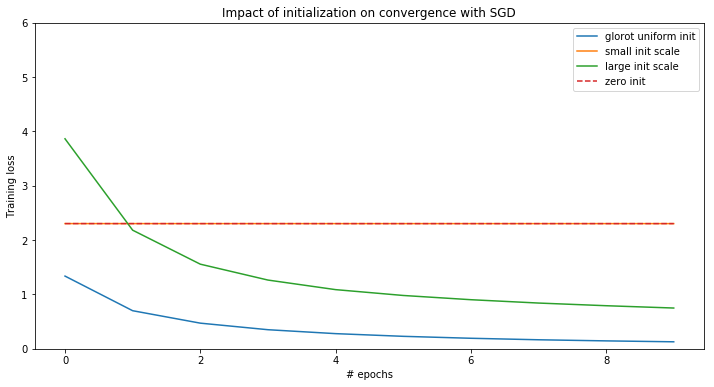

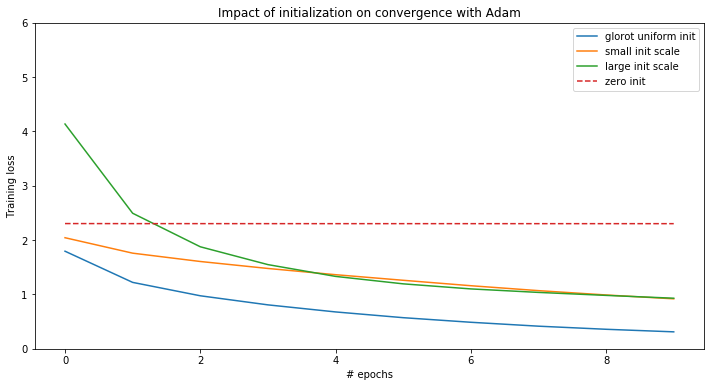

In [60]:
# %load solutions/keras_initializations.py
large_scale_init = initializers.RandomNormal(stddev=1)
small_scale_init = initializers.RandomNormal(stddev=1e-3)


optimizer_list = [
    ('SGD', optimizers.SGD(lr=0.1)),
    ('Adam', optimizers.Adam()),
#     ('SGD + Nesterov momentum', optimizers.SGD(
#             lr=0.1, momentum=0.9,nesterov=True)),
]

init_list = [
    ('glorot uniform init', 'glorot_uniform', '-'),
    ('small init scale', small_scale_init, '-'),
    ('large init scale', large_scale_init, '-'),
    ('zero init', 'zero', '--'),
]


for optimizer_name, optimizer in optimizer_list:
    plt.figure(figsize=(12, 6))
    for init_name, init, linestyle in init_list:
        model = Sequential()
        model.add(Dense(H, input_dim=N, kernel_initializer=init))
        model.add(Activation("tanh"))
        model.add(Dense(K, kernel_initializer=init))
        model.add(Activation("tanh"))
        model.add(Dense(K, kernel_initializer=init))
        model.add(Activation("softmax"))

        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy')

        history = model.fit(X_train, Y_train,
                            epochs=10, batch_size=32, verbose=0)
        plt.plot(history.history['loss'], linestyle=linestyle,
                 label=init_name)

    plt.xlabel('# epochs')
    plt.ylabel('Training loss')
    plt.ylim(0, 6)
    plt.legend(loc='best');
    plt.title('Impact of initialization on convergence with %s'
              % optimizer_name)

In [ ]:
# %load solutions/keras_initializations_analysis.py
# Analysis
#
# If the network is initialized to zero weights, the activations of the hidden
# layers are always set to zero, whatever the value of the inputs. The gradient
# is always zero for all training samples and no learning can happen with any
# gradient-based optimizer (SGD, Adam...): the loss stays constant.
#
# A network with null weights has null gradients but this not a local minimum
# (nor a local maximum): it is a saddle point at the center of a neighborhood
# with very low gradients. 
#
# Therefore when the scale of a random initializations of the weights is too
# small, SGD has a hard time evading that area of low gradients. Adding
# momentum can help but especially for deep networks it can take many epochs to
# evade the area.
#
# Initializing the weights with large random values will make the output
# distribution (softmax) very peaky: the network is very "confident" of its
# predictions even if they are completely random. This leads to a very high
# initial loss value.
#
# The softmax function does not saturate (bad classification always have a
# non-zero gradient). However the intermediate tanh layers can saturate,
# therefore squashing the gradients and making the network train much slower. 
#
# The Glorot uniform init uses a scale that depends on the dimensions of the
# weigh matrix so has to preserve the average norm of activations and flowing
# gradients so as to make learning possible. Keras provides alternatives that
# can be better in some cases. Please refer to the references in the Keras
# documentation to learn more on the theoretical justifications behind those
# schemes.
#
# Adam tends to be more robust when it comes to bad initialization thanks to
# its per-weight learning rate adjustments but still benefits from a good
# initialization.
#
# More on this in a later class on optimization issues. For now  just remember
# that if you network fails to learn at all (the loss stays at its initial
# value):
#
# - ensure that the weights are properly initialized,
# - inspect the per-layer gradient norms to help identify the bad layer,
# - use Adam instead of SGD as your default go to initializer.
